# 🧠 RNN vs Feedforward Neural Network – Temperature Prediction

## 🎯 Objective
Predict the next day’s **minimum temperature** using historical daily temperature data. Compare how a **Feedforward Neural Network (FNN)** and a **Recurrent Neural Network (RNN)** handle sequential data.

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'])
print(data.head())
print(data.describe())

        Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8
                      Date         Temp
count                 3650  3650.000000
mean   1985-12-31 07:12:00    11.177753
min    1981-01-01 00:00:00     0.000000
25%    1983-07-02 06:00:00     8.300000
50%    1985-12-31 12:00:00    11.000000
75%    1988-06-30 18:00:00    14.000000
max    1990-12-31 00:00:00    26.300000
std                    NaN     4.071837


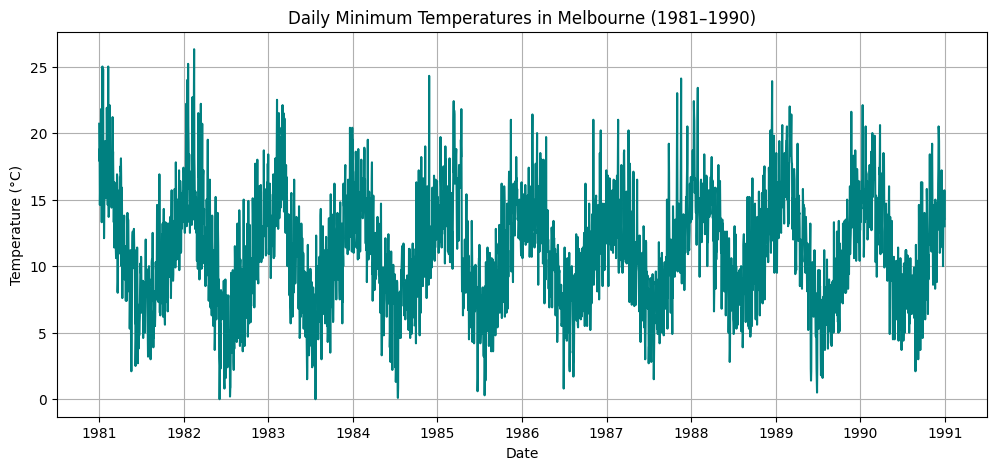

In [4]:
plt.figure(figsize=(12,5))
plt.plot(data['Date'], data['Temp'], color='teal')
plt.title("Daily Minimum Temperatures in Melbourne (1981–1990)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

In [5]:
values = data['Temp'].values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

def create_sequences(data, n_steps=1):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 3
X, y = create_sequences(scaled, n_steps)

X_train, X_test = X[:-365], X[-365:]
y_train, y_test = y[:-365], y[-365:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (3282, 3, 1)
y_train shape: (3282, 1)


In [6]:
model_ffn = Sequential([
    Dense(50, activation='relu', input_shape=(n_steps,)),
    Dense(25, activation='relu'),
    Dense(1)
])

model_ffn.compile(optimizer=Adam(0.001), loss='mse')
history_ffn = model_ffn.fit(
    X_train.reshape(X_train.shape[0], n_steps), y_train,
    epochs=50, verbose=0,
    validation_data=(X_test.reshape(X_test.shape[0], n_steps), y_test)
)


C:\Users\DuaaHilal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model_rnn = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(n_steps, 1)),
    Dense(1)
])

model_rnn.compile(optimizer=Adam(0.001), loss='mse')
history_rnn = model_rnn.fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_test, y_test))


C:\Users\DuaaHilal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
y_pred_ffn = model_ffn.predict(X_test.reshape(X_test.shape[0], n_steps))
y_pred_rnn = model_rnn.predict(X_test)

y_test_inv = scaler.inverse_transform(y_test)
y_pred_ffn_inv = scaler.inverse_transform(y_pred_ffn)
y_pred_rnn_inv = scaler.inverse_transform(y_pred_rnn)

rmse_ffn = np.sqrt(mean_squared_error(y_test_inv, y_pred_ffn_inv))
rmse_rnn = np.sqrt(mean_squared_error(y_test_inv, y_pred_rnn_inv))

print("Feedforward NN RMSE:", rmse_ffn)
print("RNN RMSE:", rmse_rnn)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 
Feedforward NN RMSE: 2.406888610845736
RNN RMSE: 2.396520782103951


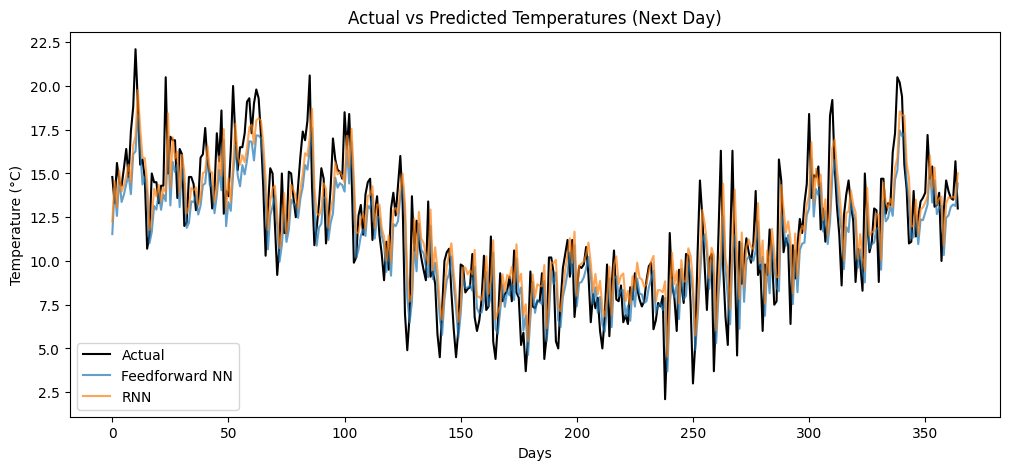

In [9]:
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label='Actual', color='black')
plt.plot(y_pred_ffn_inv, label='Feedforward NN', alpha=0.7)
plt.plot(y_pred_rnn_inv, label='RNN', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Temperatures (Next Day)")
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.show()

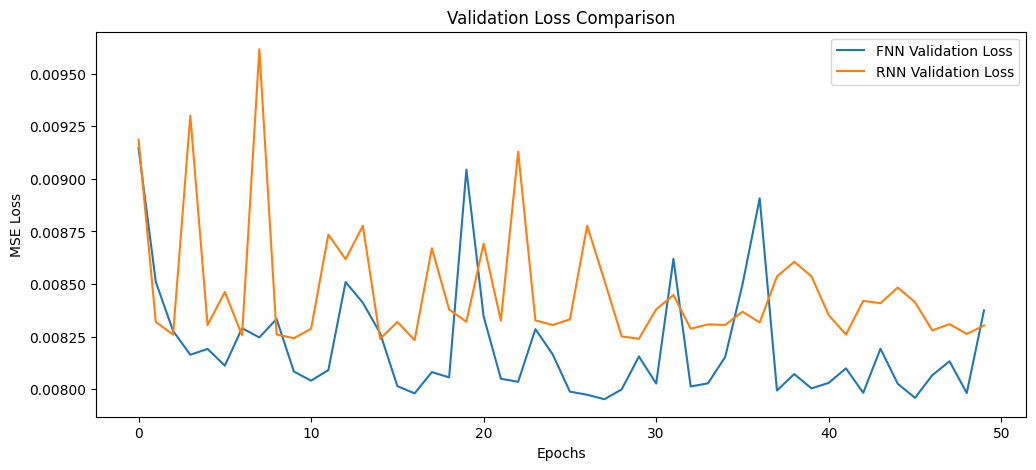

In [10]:
plt.figure(figsize=(12,5))
plt.plot(history_ffn.history['val_loss'], label='FNN Validation Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss')
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()